In [1]:
import sys
sys.path.append('../..')

In [2]:
from lib.pdb import get_all_pdb_names

In [3]:
import matplotlib.pyplot as plt
import numpy as np

ligand_sasa = np.load('ligand_sasa.npy')

In [4]:
ligand_sasa[ligand_sasa < 0.0156].shape
# 0.05, 0.1

(212,)

In [5]:
indices = np.where((ligand_sasa > 49) & (ligand_sasa < 50))[0]
indices

array([], dtype=int64)

In [6]:
all_protein = get_all_pdb_names()

In [7]:
all_protein[852]

'1c5x'

In [8]:
ligand_sasa[indices]

array([], dtype=float64)

[0.         0.01577351 0.03154701 0.04732052 0.06309403 0.07886753
 0.09464104 0.11041455 0.12618805 0.14196156 0.15773507 0.17350857
 0.18928208 0.20505558 0.22082909 0.2366026  0.2523761  0.26814961
 0.28392312 0.29969662 0.31547013 0.33124364 0.34701714 0.36279065
 0.37856416 0.39433766 0.41011117 0.42588468 0.44165818 0.45743169
 0.4732052  0.4889787  0.50475221 0.52052572 0.53629922 0.55207273
 0.56784624 0.58361974 0.59939325 0.61516675 0.63094026 0.64671377
 0.66248727 0.67826078 0.69403429 0.70980779 0.7255813  0.74135481
 0.75712831 0.77290182 0.78867533]


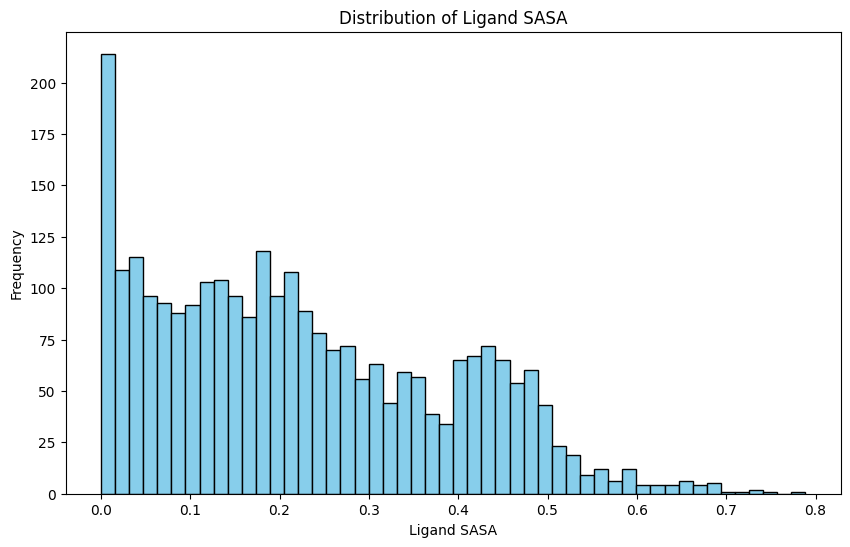

0.007886753263914793


In [9]:
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(ligand_sasa, bins=50, color='skyblue', edgecolor='black')
print(bins)
peak_index = np.argmax(counts)
peak_x = (bins[peak_index] + bins[peak_index + 1]) / 2
plt.title('Distribution of Ligand SASA')
plt.xlabel('Ligand SASA')
plt.ylabel('Frequency')
plt.show()
print(peak_x)

In [4]:
from lib.pdb import get_all_pdb_names

In [5]:
hydrophobic = []
hydrophilic = []
neutral = []

for pdb_name, hydrophobicity in zip(get_all_pdb_names(), hydrophobicities):
    if hydrophobicity > 9:
        hydrophobic.append(pdb_name)
    else:
        hydrophilic.append(pdb_name)

In [6]:
len(hydrophilic) ,len(hydrophobic), len(neutral)

(2354, 365, 0)

In [6]:
with open('../../../data/pdb_group/ave_SASA_large_9_pdb', mode='w') as f:
    for pdb in hydrophobic:
        f.write(pdb + '\n')

In [7]:
with open('../../../data/pdb_group/ave_SASA_small_9_pdb', mode='w') as f:
    for pdb in hydrophilic:
        f.write(pdb + '\n')

In [93]:
with open('../../data/neutral_500_pdb', mode='w') as f:
    for pdb in neutral:
        f.write(pdb + '\n')

In [8]:
with open('../../../data/train_list', mode='r') as f:
    train_pdb_list = f.read().splitlines()
with open('../../../data/val_list', mode='r') as f:
    val_pdb_list = f.read().splitlines()
train_pdb_set = set(train_pdb_list)
val_pdb_set = set(val_pdb_list)

In [8]:
with open('../../../data/test_list', mode='r') as f:
    test_pdb_list = f.read().splitlines()
test_pdb_set = set(test_pdb_list)


In [9]:
hydrophobic_set = set(hydrophobic)
hydrophilic_set = set(hydrophilic)
# neutral_set = set(neutral)

In [10]:
test_hydrophobic = list(((train_pdb_set | val_pdb_set) & hydrophobic_set))
test_hydrophilic = list(((train_pdb_set | val_pdb_set) & hydrophilic_set))
# test_neutral = list(((train_pdb_set | val_pdb_set) & neutral_set))

In [10]:
test_hydrophobic = list((test_pdb_set & hydrophobic_set))
test_hydrophilic = list((test_pdb_set & hydrophilic_set))

In [11]:
with open('../../../data/test_ave_SASA_large_9_pdb', mode='w') as f:
    for pdb in test_hydrophobic:
        f.write(pdb + '\n')

In [12]:
with open('../../../data/test_ave_SASA_small_9_pdb', mode='w') as f:
    for pdb in test_hydrophilic:
        f.write(pdb + '\n')

In [98]:
with open('../../data/test_neutral_500_pdb', mode='w') as f:
    for pdb in test_neutral:
        f.write(pdb + '\n')